# Differential Evolution For Digital Watermarking

In [1]:
import random
import cv2
import numpy as np
from DEwatermarking import watermarking
import test
from matplotlib import pyplot as plt

### Cost Function

In [2]:
Watermarking = watermarking(level=3)
def cost(x):
    Watermarking = watermarking(level=3, x = x)
    Watermarking.watermark()
    Watermarking.extracted()
    return Watermarking.psnr_cal()

In [3]:
def ensure_bounds(vec, bounds):

    vec_new = []
    # cycle through each variable in vector
    for i in range(len(vec)):

        # variable exceedes the minimum boundary
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])

        # variable exceedes the maximum boundary
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])

        # the variable is fine
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
       
    return vec_new


#--- MAIN ---------------------------------------------------------------------+

def differential_evolution(cost_func, bounds, popsize, mutate, recombination, maxiter):

    #--- INITIALIZE A POPULATION (step #1) ----------------+
   
     #population = []
#     for i in range(0,popsize):
#         indv = []
#         for j in range(len(bounds)):
#             indv.append(random.uniform(bounds[j][0],bounds[j][1]))
#         population.append(indv)
    population = [ [0.025],
                  [0.045],
                  [0.0675],
                  [0.06666667]
            ]       
    print("\nPOPULATION: ", population)
    #--- SOLVE --------------------------------------------+

    # cycle through each generation (step #2)
    for i in range(1,maxiter+1):
        print ('GENERATION:',i)

        gen_scores_psnr = [] # score keeping psnr
        gen_scores_nc = [] #score keeping nc
        # cycle through each individual in the population
        for j in range(0, popsize):

            #--- MUTATION (step #3.A) ---------------------+
           
            # select three random vector index positions [0, popsize), not including current vector (j)
            canidates = range(0,popsize)
            #canidates.remove(j)
            random_index = random.sample(canidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j]     # target individual

            # subtract x3 from x2, and create a new vector (x_diff)
            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]

            # multiply x_diff by the mutation factor (F) and add to x_1
            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            #--- RECOMBINATION (step #3.B) ----------------+

            v_trial = []
            for k in range(len(x_t)):
                crossover = random.random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])

                else:
                    v_trial.append(x_t[k])
                   
            #--- GREEDY SELECTION (step #3.C) -------------+

            score_trial  = cost_func(v_trial)
            score_target = cost_func(x_t)
            print("\nscore_trial: ", score_trial)
            print("score_target: ", score_target)

            if score_trial > score_target:
                population[j] = v_trial
                gen_scores_psnr.append(score_trial[0])
                gen_scores_nc.append(score_trial[1])
                print ('   >',score_trial, v_trial)
                gen_sol = score_trial

            else:
                print ('   >',score_target, x_t)
                gen_scores_psnr.append(score_target[0])
                gen_scores_nc.append(score_target[1])
                gen_sol = score_target

        #--- SCORE KEEPING --------------------------------+

        gen_avg_psnr = sum(gen_scores_psnr) / popsize                         # current generation avg. fitness
        gen_best_psnr = max(gen_scores_psnr)                                  # fitness of best individual
        gen_sol_psnr = population[gen_scores_psnr.index(max(gen_scores_psnr))]     # solution of best individual

        gen_avg_nc = sum(gen_scores_nc) / popsize
        gen_best_nc = max(gen_scores_nc)
        gen_sol_nc = population[gen_scores_nc.index(max(gen_scores_nc))]
        print ('      > GENERATION AVERAGE PSNR: ',gen_avg_psnr)
        print ('      > GENERATION BEST PSNR:',gen_best_psnr)
        print ('         > BEST SOLUTION PSNR:',gen_sol_psnr,'\n')
        
        print ('      > GENERATION AVERAGE NC: ',gen_avg_nc)
        print ('      > GENERATION BEST NC:',gen_best_nc)
        print ('         > BEST SOLUTION NC:',gen_sol_nc,'\n')
        
        if gen_best_psnr > psnr_value and gen_best_nc > nc_value: 
            break
    return gen_best_psnr, gen_best_nc, gen_sol_psnr

#--- CONSTANTS ----------------------------------------------------------------+

cost_func = cost                 # Cost function
bounds = [(0,1)]            # Bounds [(x1_min, x1_max), (x2_min, x2_max),...]
popsize = 4                       # Population size, must be >= 4
mutate = 0.015                        # Mutation factor [0,2]
recombination = 0.7                 # Recombination rate [0,1]
maxiter = 400                      # Max number of generations (maxiter)
psnr_value = 35
nc_value = 0.43
#--- RUN ----------------------------------------------------------------------+

print(differential_evolution(cost_func, bounds, popsize, mutate, recombination, maxiter))



POPULATION:  [[0.025], [0.045], [0.0675], [0.06666667]]
GENERATION: 1

score_trial:  (28.91606987548469, 0.42935521960686823)
score_target:  (37.4597181258439, 0.43031202090296566)
   > (37.4597181258439, 0.43031202090296566) [0.025]

score_trial:  (32.503221898182446, 0.4293637194028085)
score_target:  (32.503221898182446, 0.4293637194028085)
   > (32.503221898182446, 0.4293637194028085) [0.045]

score_trial:  (29.001426151095316, 0.4304418867109716)
score_target:  (29.001426151095316, 0.4304418867109716)
   > (29.001426151095316, 0.4304418867109716) [0.0675]

score_trial:  (37.5762063705234, 0.42962792974135294)
score_target:  (29.10739600558078, 0.4296397399970922)
   > (37.5762063705234, 0.42962792974135294) [0.024674999950000002]
      > GENERATION AVERAGE PSNR:  34.135143136411266
      > GENERATION BEST PSNR: 37.5762063705234
         > BEST SOLUTION PSNR: [0.024674999950000002] 

      > GENERATION AVERAGE NC:  0.4299363891895247
      > GENERATION BEST NC: 0.4304418867109716


________________________

# Attacks on Watermarked Image


## 1. Gaussian Noise Attack

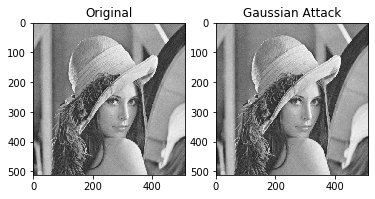

For  Gaussian Noise Attack
PSNR:  63.36750626074319 NC:  0.42930346092613375


In [4]:
test.add_gaussian_noise("watermarked_lena.jpg")
test.plot_image("watermarked_lena.jpg", 'gaussian_noise_attack.jpg', 'Gaussian Attack')
test.print_data("Gaussian Noise Attack", "gaussian_noise_attack.jpg", "watermarked_lena.jpg")

In [5]:
Watermarking = watermarking(level=3, x = [0.1])
Watermarking.watermark()

For the Watermark image
For  Gaussian Noise Attack
PSNR:  4.320042378917222 NC:  0.599001101335017


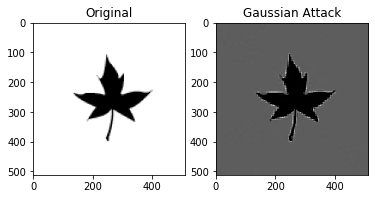

In [6]:
Watermarking.extracted(image_path="gaussian_noise_attack.jpg", extracted_watermark_path = "watermark_extracted_gaussian.jpg")
Watermarking.psnr_cal(img1="watermark1.jpg" , img2="watermark_extracted_gaussian.jpg")
print("For the Watermark image")
test.print_data("Gaussian Noise Attack", "watermark1.jpg", "watermark_extracted_gaussian.jpg")
test.plot_image("watermark1.jpg", 'watermark_extracted_gaussian.jpg', 'Gaussian Attack')

_______________________
## 2. Salt Pepper Noise Attack

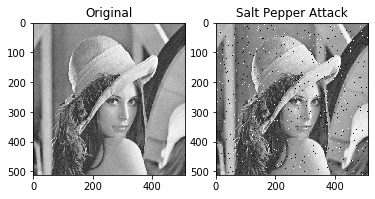

For  Salt and Pepper Noise Attack
PSNR:  22.271711291605243 NC:  0.4299800943921823


In [7]:
test.add_salt_pepper_noise("watermarked_lena.jpg", prob = 0.01)
test.plot_image("watermarked_lena.jpg", "salt_pepper_noise_attack.jpg", 'Salt Pepper Attack')
test.print_data("Salt and Pepper Noise Attack", "salt_pepper_noise_attack.jpg", "watermarked_lena.jpg")

For the Watermark image
For  Salt and Pepper Attack
PSNR:  6.851858745631981 NC:  0.5057162478042921


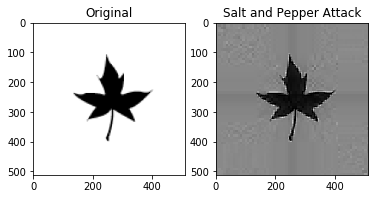

In [8]:
Watermarking.extracted(image_path="salt_pepper_noise_attack.jpg", extracted_watermark_path = "watermark_extracted_salt_pepper.jpg")
Watermarking.psnr_cal(img1="watermark1.jpg" , img2="watermark_extracted_salt_pepper.jpg")
print("For the Watermark image")
test.print_data("Salt and Pepper Attack", "watermark1.jpg", "watermark_extracted_salt_pepper.jpg")
test.plot_image("watermark1.jpg", "watermark_extracted_salt_pepper.jpg", "Salt and Pepper Attack")

_______________________
## 3. Rotation Attack

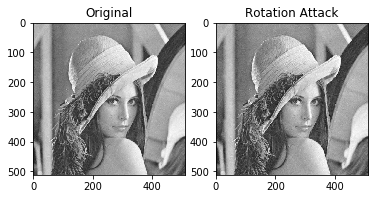

For  Rotation Attack
PSNR:  42.17690685616466 NC:  0.4302515149698995


In [9]:
test.add_rotation_test(0, "watermarked_lena.jpg")
test.plot_image("watermarked_lena.jpg", "rotation_attack.jpg", 'Rotation Attack')
test.print_data("Rotation Attack", "rotation_attack.jpg", "watermarked_lena.jpg")

For the Watermark image
For  Rotation Attack
PSNR:  7.2855683948286405 NC:  0.4788521664475121


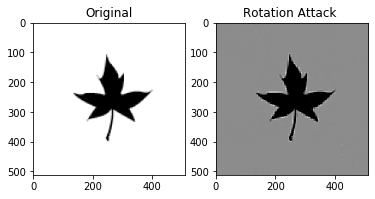

In [10]:
Watermarking.extracted(image_path="rotation_attack.jpg", extracted_watermark_path = "watermark_extracted_rotation.jpg")
Watermarking.psnr_cal(img1="watermark1.jpg" , img2="watermark_extracted_rotation.jpg")
print("For the Watermark image")
test.print_data("Rotation Attack", "watermark1.jpg", "watermark_extracted_rotation.jpg")
test.plot_image("watermark1.jpg", "watermark_extracted_rotation.jpg", "Rotation Attack ")

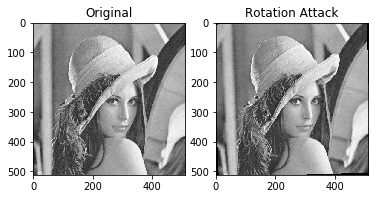

For  Rotation Attack
PSNR:  17.2934876236423 NC:  0.4301220037692431


In [11]:
test.add_rotation_test(2, "watermarked_lena.jpg")
test.plot_image("watermarked_lena.jpg", "rotation_attack.jpg", 'Rotation Attack')
test.print_data("Rotation Attack", "rotation_attack.jpg", "watermarked_lena.jpg")

For the Watermark image
For  Rotation Attack
PSNR:  5.92506248275412 NC:  0.49910365672752677


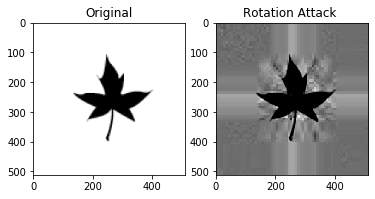

In [12]:
Watermarking.extracted(image_path="rotation_attack.jpg", extracted_watermark_path = "watermark_extracted_rotation.jpg")
Watermarking.psnr_cal(img1="watermark1.jpg" , img2="watermark_extracted_rotation.jpg")
print("For the Watermark image")
test.print_data("Rotation Attack", "watermark1.jpg", "watermark_extracted_rotation.jpg")
test.plot_image("watermark1.jpg", "watermark_extracted_rotation.jpg", "Rotation Attack ")

___________________________________
## 4. Cropping Attack

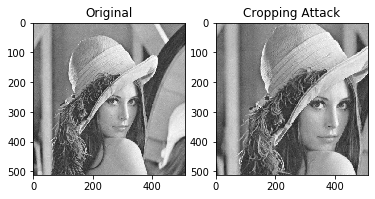

For  Crop Attack
PSNR:  11.39358435728077 NC:  0.43097291291860335


In [13]:
test.rescale_test("watermarked_lena.jpg")
test.plot_image("watermarked_lena.jpg", "cropped_attack.jpg", 'Cropping Attack') 
test.print_data("Crop Attack", "cropped_attack.jpg", "watermarked_lena.jpg")

For the Watermark image
For  Cropping Attack
PSNR:  4.535444639947198 NC:  0.47054885169737154


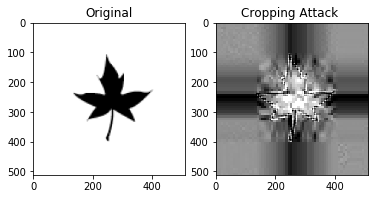

In [14]:
Watermarking.extracted(image_path="cropped_attack.jpg", extracted_watermark_path = "watermark_extracted_crop.jpg")
Watermarking.psnr_cal(img1="watermark1.jpg" , img2="watermark_extracted_crop.jpg")
print("For the Watermark image")
test.print_data("Cropping Attack", "watermark1.jpg", "watermark_extracted_crop.jpg")
test.plot_image("watermark1.jpg", "watermark_extracted_crop.jpg", "Cropping Attack ")

_______________
## 5. Poisson Noise Attack

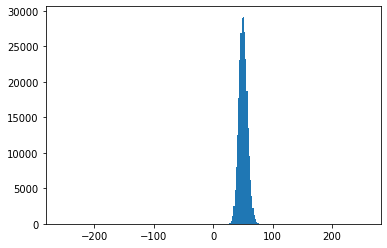

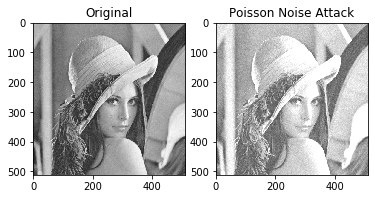

For  Poisson Noise Attack
PSNR:  14.39111164062667 NC:  0.4298065329980962


In [15]:
test.add_poisson_noise("watermarked_lena.jpg")
test.plot_image("watermarked_lena.jpg", "poisson_noise_attack.jpg", 'Poisson Noise Attack')
test.print_data("Poisson Noise Attack", "poisson_noise_attack.jpg", "watermarked_lena.jpg")

For the Watermark image
For  Poisson Noise Attack
PSNR:  11.636764528895636 NC:  1.4982822469652897


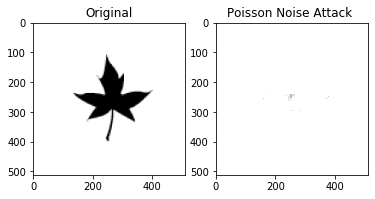

In [16]:
Watermarking.extracted(image_path="poisson_noise_attack.jpg", extracted_watermark_path = "watermark_extracted_poisson_noise.jpg")
Watermarking.psnr_cal(img1="watermark1.jpg" , img2="watermark_extracted_poisson_noise.jpg")
print("For the Watermark image")
test.print_data("Poisson Noise Attack", "watermark1.jpg", "watermark_extracted_poisson_noise.jpg")
test.plot_image("watermark1.jpg", "watermark_extracted_poisson_noise.jpg", "Poisson Noise Attack ")

In [17]:
test.testing("watermarked_lena.jpg")

For  Gaussian Noise Attack
PSNR:  35.09429187982258 NC:  0.4306109452691435
For  Salt and Pepper Noise Attack
PSNR:  22.271711291605243 NC:  0.4299800943921823
For  Rotation Attack
PSNR:  17.2934876236423 NC:  0.4301220037692431
For  Crop Attack
PSNR:  11.39358435728077 NC:  0.43097291291860335
For  Poisson Noise Attack
PSNR:  14.39111164062667 NC:  0.4298065329980962


In [18]:
test.rotate("watermarked_lena.jpg")

Degree:  -90  ---PSNR:  10.527189700381143 ---NC:  0.4297937759409559
Degree:  -80  ---PSNR:  9.980065023782037 ---NC:  0.4298956725339895
Degree:  -70  ---PSNR:  9.584087760298498 ---NC:  0.4301674379348361
Degree:  -60  ---PSNR:  9.396304448840729 ---NC:  0.4302858076540594
Degree:  -50  ---PSNR:  9.561050213276657 ---NC:  0.4311003102017812
Degree:  -40  ---PSNR:  9.610429325433516 ---NC:  0.43050659796208013
Degree:  -30  ---PSNR:  9.761289629069243 ---NC:  0.43008396210232325
Degree:  -20  ---PSNR:  10.35147759333132 ---NC:  0.4307530413305822
Degree:  -10  ---PSNR:  11.552792815578458 ---NC:  0.4308672405225198
Degree:  0  ---PSNR:  42.17690685616466 ---NC:  0.4302515149698995
Degree:  10  ---PSNR:  11.680840772733108 ---NC:  0.4306898020605249
Degree:  20  ---PSNR:  10.406219876634966 ---NC:  0.4302017163420857
Degree:  30  ---PSNR:  9.830585613075792 ---NC:  0.43062612418068047
Degree:  40  ---PSNR:  9.655058812400597 ---NC:  0.4298627068427205
Degree:  50  ---PSNR:  9.51898025